https://www.tensorflow.org/guide/keras/train_and_evaluate?hl=es

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
# Construimos el modelo

# Las entradas van a tener 784 dimensiones en forma de vector (28x28)
inputs = keras.Input(shape=(784,), name="digits")
# Primera capa de la red, con 64 neuronas y usando ReLu
x1 = layers.Dense(64, activation="relu")(inputs)
# Segunda capa de la red, con 64 neuronas y usando ReLu
x2 = layers.Dense(32, activation="relu")(x1)
# La salida de la red con 10 neuronas porque estamos usando un algoritmo de clasificación de 10
# Softmax 
outputs = layers.Dense(10, activation="softmax", name="predictions")(x2)

model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
# Ejemplo de otra creación de capas (NO EJECUTAR)

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation="softmax")
  ])
# la ultima capa siempre tiene que ser softmax

In [11]:
# Cogemos las imágenes de los dígitos y cogemos el conjunto de train, val y test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [25]:
# 60000 imagenes de 28x28 pixeles
x_train.shape

(50000, 784)

In [22]:
# Normalizamos la imagen dividiéndola por 255 y transformándola a imagen 28x28
to_show = (x_train[1]/255).reshape(28,28)
to_show

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

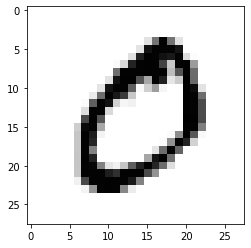

In [23]:
import matplotlib.pyplot as plt

plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

In [24]:
# Preprocess the data (these are NumPy arrays)
# Transormar cada imagen en un vector
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [26]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [27]:
# Summary
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
predictions (Dense)          (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/15
782/782 [==============================] - 1s 866us/step - loss: 0.3557 - sparse_categorical_accuracy: 0.9011 - val_loss: 0.2018 - val_sparse_categorical_accuracy: 0.9431
Epoch 2/15
782/782 [==============================] - 1s 716us/step - loss: 0.1694 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.1581 - val_sparse_categorical_accuracy: 0.9520
Epoch 3/15
782/782 [==============================] - 1s 710us/step - loss: 0.1263 - sparse_categorical_accuracy: 0.9631 - val_loss: 0.1223 - val_sparse_categorical_accuracy: 0.9635
Epoch 4/15
782/782 [==============================] - 1s 759us/step - loss: 0.1010 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.1208 - val_sparse_categorical_accuracy: 0.9658
Epoch 5/15
782/782 [==============================] - 1s 770us/step - loss: 0.0848 - sparse_categorical_accuracy: 0.9749 - val_loss: 0.1119 - val_sparse_categorical_accuracy: 0.9668
Epoch 6/15
782/782 [==============================] - 1s 763us/

In [28]:
# Podemos ver el histórico que ha ocurrido cogiendo el mejor de cada epoch
history.history

NameError: name 'history' is not defined

In [30]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 571us/step - loss: 0.1100 - sparse_categorical_accuracy: 0.9728
test loss, test acc: [0.10998820513486862, 0.9728000164031982]


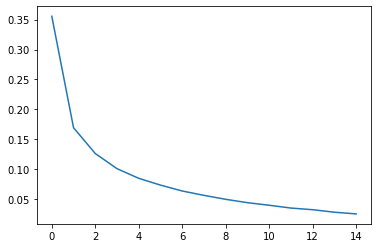

In [35]:
plt.plot(history.history["loss"])

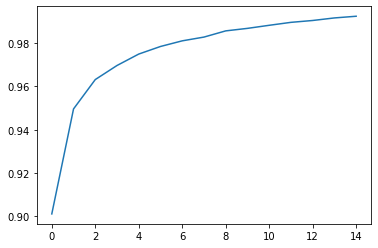

In [36]:
plt.plot(history.history['sparse_categorical_accuracy'])

In [37]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:1])
print("predictions shape:", predictions.shape)
predictions

Generate predictions for 3 samples
predictions shape: (1, 10)


array([[7.9633279e-11, 3.2341458e-13, 5.7727878e-08, 3.1013553e-06,
        1.7421859e-18, 4.2084683e-10, 2.7654753e-15, 9.9999678e-01,
        5.5122523e-10, 5.4728467e-08]], dtype=float32)

In [58]:
predictions.max()

0.9999999

In [59]:
predictions.argmax()

7

In [60]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)
for i,image_predicted in enumerate(predictions):
    print("Image",i,":", image_predicted.argmax())
    #plt.imshow(x_test[2:3].reshape(28,28), cmap=plt.cm.get_cmap('Greys'))

Generate predictions for 3 samples
predictions shape: (3, 10)
Image 0 : 7
Image 1 : 2
Image 2 : 1


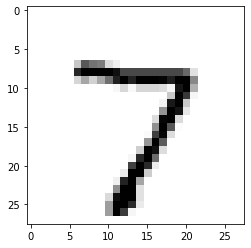

In [38]:
to_show = (x_test[0]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

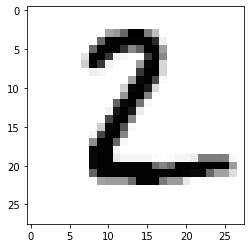

In [39]:
to_show = (x_test[1]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))

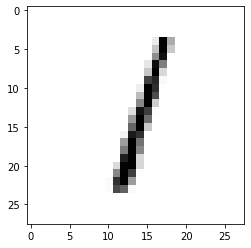

In [40]:
to_show = (x_test[2]/255).reshape(28,28)
plt.imshow(to_show, cmap=plt.cm.get_cmap('Greys'))